<a href="https://colab.research.google.com/github/rjrockzz/sensor-data-correlation/blob/master/Daily%20Update/har7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install numba
!pip install umap-learn
!pip install bokeh==0.12.15
!pip install holoviews==1.10.4 
!pip install colorcet
!pip install datashader
!pip install -q scikit-plot
!pip install hyperas
!pip install seq2seq-lstm
!pip install phased-lstm-keras

     |████████████████████████████████| 13.6MB 308kB/s 
  Created wheel for bokeh: filename=bokeh-0.12.15-cp36-none-any.whl size=4939344 sha256=c0592cd05ac87f4c0400b17d83390be2b6e5c0b1024b5ea6989183c066e5905e
  Stored in directory: /root/.cache/pip/wheels/0a/56/87/e8aaa58b05288bb4004cb11db4d502134552c996c0d84c0704
Successfully built bokeh
  Found existing installation: bokeh 1.4.0
    Uninstalling bokeh-1.4.0:
      Successfully uninstalled bokeh-1.4.0
     |████████████████████████████████| 7.4MB 2.8MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
  Created wheel for holoviews: filename=holoviews-1.10.4-cp36-none-any.whl size=3604619 sha256=7ca54669e3aace9b9a61a0fb4ea847ea502cd0b31a92597e1a85336d47ef00d1
  Stored in directory: /root/.cache/pip/wheels/a4/b0/e3/1cce540190c9fb0d4914d2dc48b01b86df494638716468c2b8
Successfully built holoviews
     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 15.5MB 1.2MB/s 
     |█████████████████████

In [0]:
!pip install pandas==0.20.3

     |████████████████████████████████| 24.5MB 1.2MB/s 
ERROR: xarray 0.15.1 has requirement pandas>=0.25, but you'll have pandas 0.20.3 which is incompatible.
ERROR: seaborn 0.10.1 has requirement pandas>=0.22.0, but you'll have pandas 0.20.3 which is incompatible.
ERROR: plotnine 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.20.3 which is incompatible.
ERROR: pandas-datareader 0.8.1 has requirement pandas>=0.21, but you'll have pandas 0.20.3 which is incompatible.
ERROR: mizani 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.20.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.20.3 which is incompatible.
ERROR: featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.20.3 which is incompatible.
ERROR: fbprophet 0.6 has requirement pandas>=0.23.4, but you'll have pandas 0.20.3 which is incompatible.
ERROR: datashader 0.11.0 has requirement pandas>=0.24.1

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
from sklearn import metrics
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [0]:
pd.__version__

'0.20.3'

In [0]:
# defining input signals and the labels for activities associated.
all_signals_list = ["body_acc_x_",
                    "body_acc_y_",
                    "body_acc_z_",
                    "body_gyro_x_",
                    "body_gyro_y_",
                    "body_gyro_z_", 
                   "total_acc_x_",
                    "total_acc_y_",
                    "total_acc_z_"]
labels = ["Walking",
          "Upstairs",
          "Downstairs",
          "Sitting",
          "Standing",
          "Laying"]

dataset_path = "/content/drive/My Drive/UCI HAR Dataset"

In [0]:
Training = dataset_path+"/train"  #70% training data
Testing = dataset_path+"/test"    #30% testing data

> # Feature Selection and Data Visualizations.

In [0]:
#Feature extraction
features = list()
with open(dataset_path + "/features.txt") as feature:
    for x in feature:
        features.append(x.split()[1])
ft_df = pd.DataFrame(features)
ft_df.head()

,0
0,tBodyAcc-mean()-X
1,tBodyAcc-mean()-Y
2,tBodyAcc-mean()-Z
3,tBodyAcc-std()-X
4,tBodyAcc-std()-Y


In [0]:
ft_df.tail()

,0
556,"angle(tBodyGyroMean,gravityMean)"
557,"angle(tBodyGyroJerkMean,gravityMean)"
558,"angle(X,gravityMean)"
559,"angle(Y,gravityMean)"
560,"angle(Z,gravityMean)"


In [0]:
#Reading Train Data
train_df = pd.read_csv(dataset_path+"/train/X_train.txt",delim_whitespace=1,names = features)
train_df["person_id"] = pd.read_csv(Training+"/subject_train.txt",header = None, squeeze = True)#adding feature = person_id
#squeeze = True will return data in pandas series format
train_df["activity_id"] = pd.read_csv(Training+"/y_train.txt", header = None, squeeze = True)#adding feature = activity_id
activity_id = pd.read_csv(Training+"/y_train.txt", header = None, squeeze = True)
#mapping activity to activity name
label_name = activity_id.map({1: "WALKING",
                           2:"WALKING_UPSTAIRS",
                           3:"WALKING_DOWNSTAIRS",
                           4:"SITTING",
                           5:"STANDING",
                           6:"LYING"})
train_df["activity"] = label_name

In [0]:
train_df.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",person_id,activity_id,activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [0]:
#Reading Test Data
test_df = pd.read_csv(dataset_path+"/test/X_test.txt",delim_whitespace=1,names = features)
test_df["person_id"] = pd.read_csv(Testing+"/subject_test.txt",header = None, squeeze = True)#adding feature = person_id 
test_df["activity_id"] = pd.read_csv(Testing+"/y_test.txt", header = None, squeeze = True)#adding feature = activity_id
activity_id = pd.read_csv(Testing+"/y_test.txt", header = None, squeeze = True)
label_name = activity_id.map({1: "WALKING",
                           2:"WALKING_UPSTAIRS",
                           3:"WALKING_DOWNSTAIRS",
                           4:"SITTING",
                           5:"STANDING",
                           6:"LYING"})
test_df["activity"] = label_name

In [0]:
test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",person_id,activity_id,activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [0]:
test_df.shape

(2947, 564)

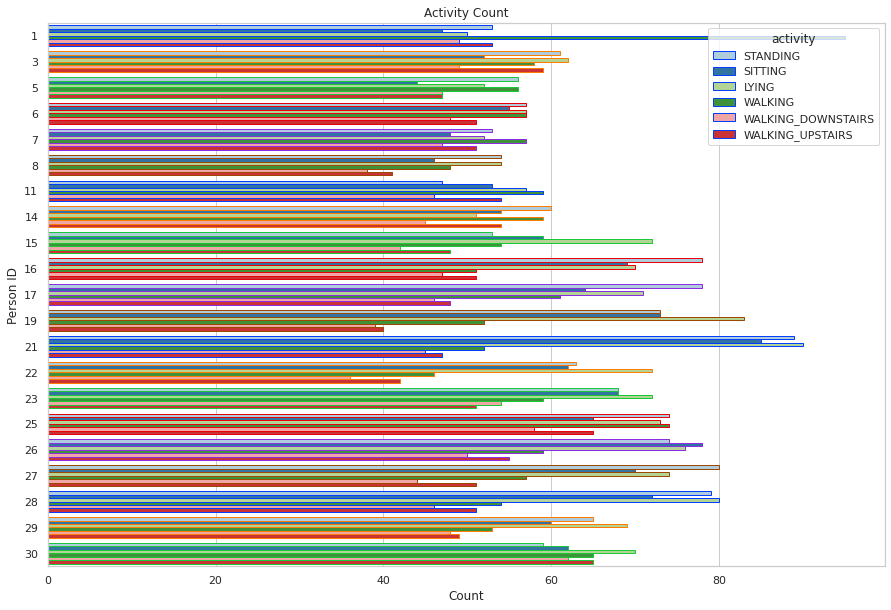

In [0]:
#Checking for any imbalance in the data
import seaborn as sns
%matplotlib inline
sns.set(style="white", palette="Paired", color_codes=True)
sns.set_style("whitegrid") 
fig = plt.figure(figsize=(15,10))
sns.countplot(y="person_id",hue="activity",
              data=train_df,
              edgecolor=sns.color_palette("bright", 6)).set_title("Activity Count")
plt.ylabel("Person ID")
plt.xlabel("Count")
plt.show()

In [0]:
color = train_df["activity_id"].map({1: 'g', 2: 'b', 3: 'y', 4: 'k', 5: 'r', 6: 'g'})
train_df['activity'].value_counts().plot.bar(rot=90,stacked = True, color=color)

In [0]:
train_df.columns

In [0]:
#Feature name changed
columns = train_df.columns
for r in (("[()]", ''), ("-", ''), (",",'')):
    columns = columns.str.replace(*r)
#earlier columns was of type panda Index. Now by writing columns.str it has been changed to pandas string.
#pandas string has a method called replace which we have used here.    
train_df.columns = columns
train_df.columns

In [0]:
train_df.columns

In [0]:
matplotlib.get_backend()

In [0]:
#catplot of the feature body acceleration magnitude mean 
sns.catplot(x="activity", y="tBodyAccMagmean", hue="activity", aspect=2, kind="swarm", data=train_df);



*  If tAccMean is < -0.5 then the Activities are either Standing or Sitting or Laying.
*   If tAccMean is > -0.5 then the Activities are either Walking or Walking Downstairs or Walking Upstairs.
  





In [0]:
#catplot of the feature acceleration gravity mean on x-axis
sns.catplot(x="activity", y="angleXgravityMean", hue="activity", aspect=2, kind="swarm", data=train_df);



*   If Acc Gravity Mean > 0, we can infer that the activity will most likely be Lying.
*   If Acc Gravity Mean < 0, we can infer that the activity can be anything but Lying.



# **Dimensionality Reduction using Uniform Manifold Approximation and Projection**<br>
[UMAP](https://umap-learn.readthedocs.io/en/latest/) Dimensionality Reduction technology used for visualizing as well as  non-linear dimension reduction. The algorithm is founded on three assumptions about the data


1.   The data is uniformly distributed on Riemannian manifold
2.   The Riemannian metric is locally constant (or can be approximated as such).
3.   The manifold is locally connected. 
<br>

![Performance Comparison vs t-SNE](https://drive.google.com/uc?export=view&id=1WpJiDkx1Ks-GHcsQaILji91PzM7DTDx1)

![t-SNE](https://drive.google.com/uc?export=view&id=1K0T-RIe2H4j0SnogHUPcV7T1MEaF5ynE)

From these assumptions it is possible to model the manifold with a fuzzy topological structure. The embedding is found by searching for a low dimensional projection of the data that has the closest possible equivalent fuzzy topological structure.

 UMAP overall follows the philosophy of tSNE, but introduces a number of improvements such as another cost function and the absence of normalization of high- and low-dimensional probabilities.

In [0]:
import colorcet
import holoviews
import bokeh
import datashader
import umap
import umap.plot
data = train_df.drop(["person_id", "activity_id", "activity"], axis = 1)
data_label = train_df["activity"]
mapper = umap.UMAP().fit(data)
umap.plot.points(mapper, labels=data_label,theme = 'fire')

In [0]:
def plt_tsne(perplexity, train_df):
    data = train_df.drop(["person_id", "activity_id", "activity"], axis = 1)
    data_label = train_df["activity"]
    applying_tsne = TSNE(n_components = 2, perplexity = perplexity, n_iter = 1000, verbose = 2)
    reduced_dim = applying_tsne.fit_transform(data)
    d = {'Dimension_1': applying_tsne.embedding_[:,0], 'Dimension_2': applying_tsne.embedding_[:,1], "activities":data_label}
    df = pd.DataFrame(data = d)
    print("Done...")
    print("Plotting TSNE Visualization...")
    sns.set_style('whitegrid') 
    sns.lmplot("Dimension_1", "Dimension_2", df, hue = 'activities', markers=['|','o','_', ">", "<", "^"], fit_reg = False, size = 10, scatter_kws={'s':100})
    plt.title("TSNE Plot for Perplexity "+str(perplexity))
    plt.show()

In [0]:
from sklearn.manifold import TSNE
import warnings
from datetime import datetime

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.511s...
[t-SNE] Computed neighbors for 7352 samples in 40.913s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.069s
[t-SNE] Iteration 50: error = 113.9186783, gradient norm = 0.0238758 (50 iterations in 4.738s)
[t-SNE] Iteration 100: error = 97.6410217, gradient norm = 0.0154752 (50 iterations in 2.383s)
[t-SNE] Iteration 150: error = 93.1681061, gradient norm =

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


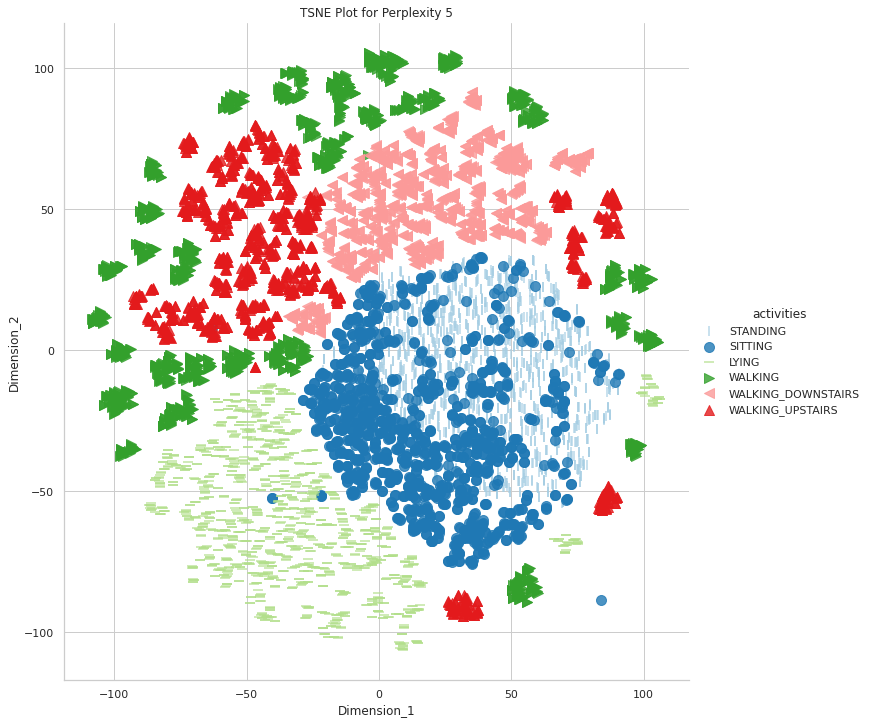

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.582s...
[t-SNE] Computed neighbors for 7352 samples in 41.528s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.128s
[t-SNE] Iteration 50: error = 105.8839874, gradient norm = 0.0179721 (50 iterations in 3.462s)
[t-SNE] Iteration 100: error = 91.1999054, gradient norm = 0.0118108 (50 iterations in 2.610s)
[t-SNE] Iteration 150: error = 87.5335999, gradient norm =

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


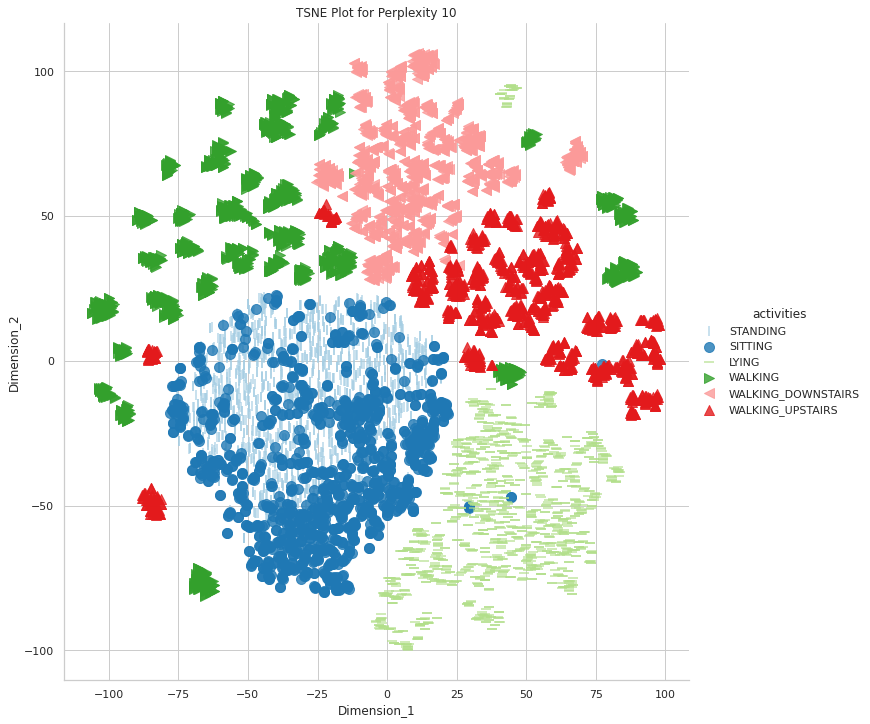

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.580s...
[t-SNE] Computed neighbors for 7352 samples in 42.985s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.258s
[t-SNE] Iteration 50: error = 97.3444366, gradient norm = 0.0219648 (50 iterations in 4.193s)
[t-SNE] Iteration 100: error = 83.8722229, gradient norm = 0.0070573 (50 iterations in 3.187s)
[t-SNE] Iteration 150: error = 81.9277649, gradient norm = 

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


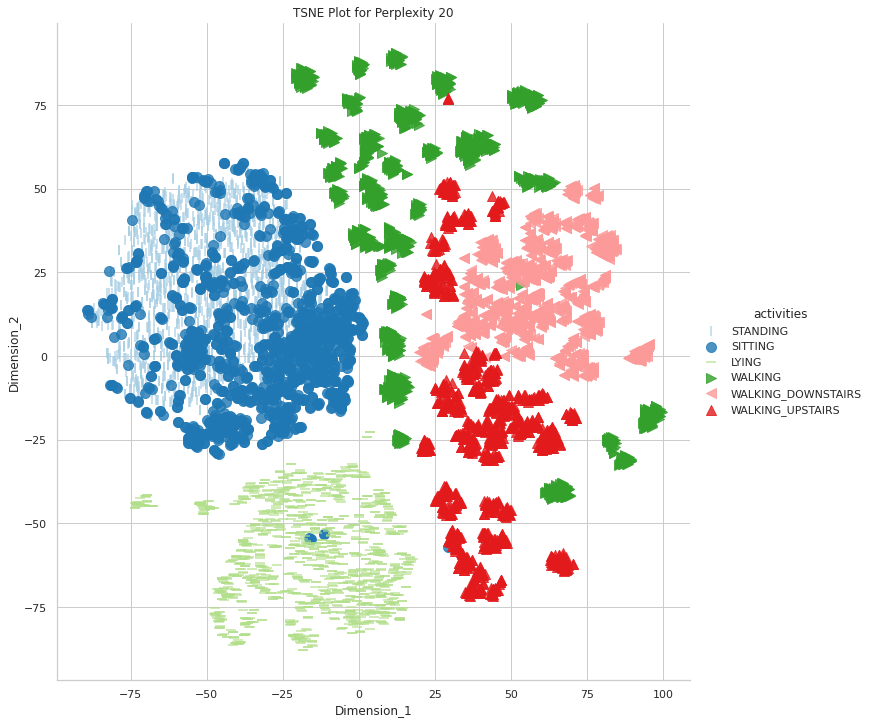

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.566s...
[t-SNE] Computed neighbors for 7352 samples in 44.104s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.399086
[t-SNE] Computed conditional probabilities in 0.510s
[t-SNE] Iteration 50: error = 87.7434998, gradient norm = 0.0302430 (50 iterations in 7.880s)
[t-SNE] Iteration 100: error = 77.7465363, gradient norm = 0.0042652 (50 iterations in 3.040s)
[t-SNE] Iteration 150: error = 76.5225372, gradient norm =

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


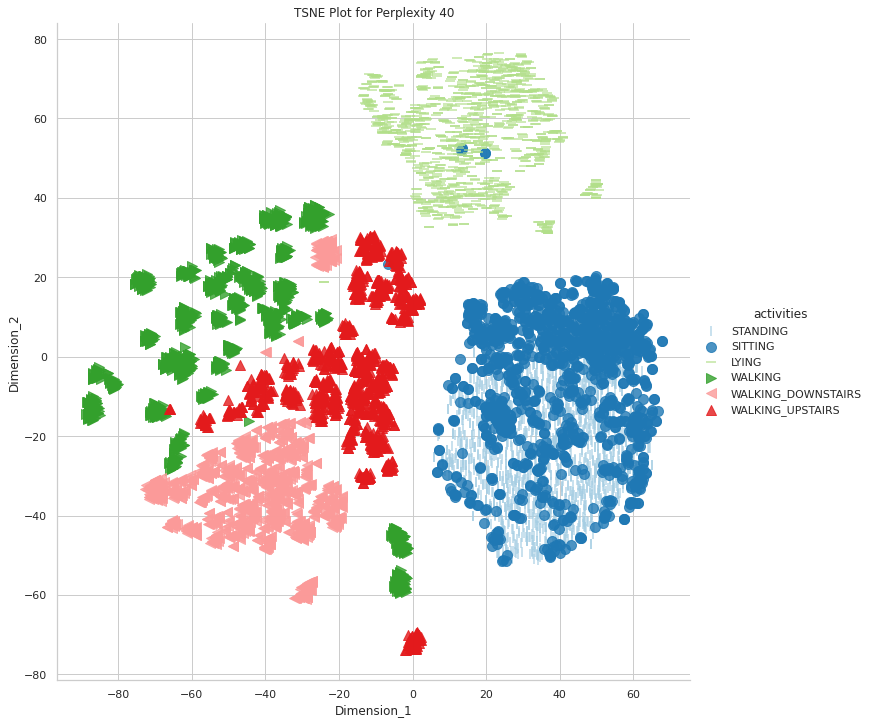

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.609s...
[t-SNE] Computed neighbors for 7352 samples in 46.894s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.559265
[t-SNE] Computed conditional probabilities in 1.291s
[t-SNE] Iteration 50: error = 78.5916595, gradient norm = 0.0144611 (50 iterations in 5.531s)
[t-SNE] Iteration 100: error = 68.5996094, gradient norm = 0.0030537 (50 iterations in 4.658s)
[t-SNE] Iteration 150: error = 68.0474091, gradient norm =

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


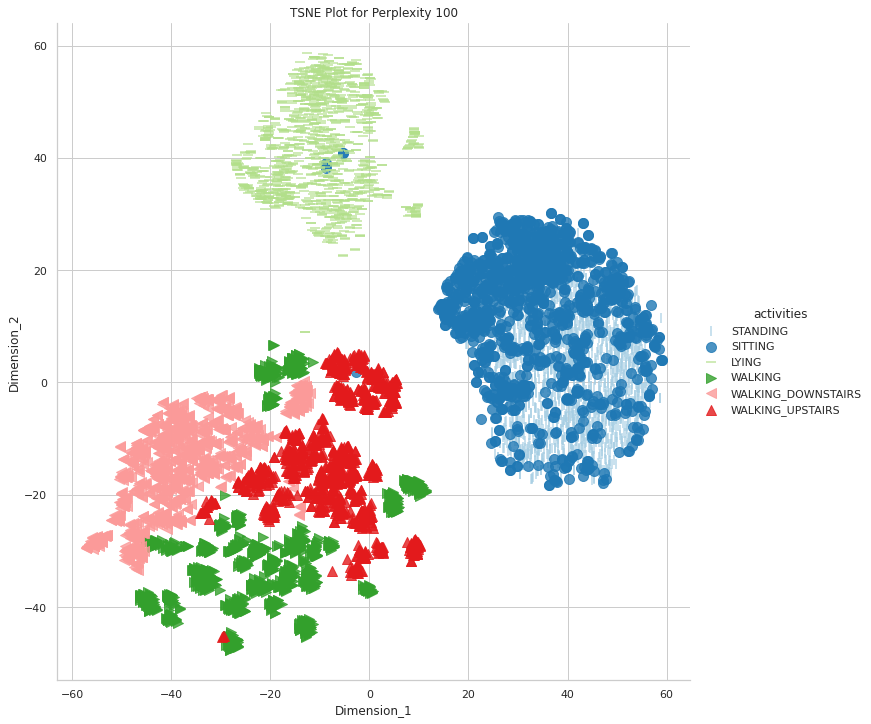

In [0]:
perplexities = [5, 10, 20, 40, 100]
for perplexity in perplexities:
    plt_tsne(perplexity, train_df)

**Observations from the UMAP Plot**


The technique can be fairly used to seperate every activity except ***SITTING*** and ***STANDING*** as denoted in the plot.

> # **Machine Learning Modelling**


In [0]:
# Dataset Preparation.
x_train = train_df.drop(["person_id", "activity", "activity_id"], axis = 1)
y_train = train_df["activity"]
x_test = test_df.drop(["person_id", "activity", "activity_id"], axis = 1)
y_test = test_df["activity"]
# 30:70 test:train split ratio.
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7352, 561), (7352,), (2947, 561), (2947,))

>**Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import scikitplot as skplt
params = {"C":[0.001,0.01,0.1,1,10**1,10**2,10**3]}
classifier = LogisticRegression(multi_class='ovr',n_jobs=1,solver='liblinear')
cross_val = GridSearchCV(classifier, params, cv=5)
cross_val.fit(x_train, y_train)
predicted = cross_val.predict(x_test)

In [0]:
logistic_accuracy = accuracy_score(y_test, predicted)
logistic_accuracy

0.9619952494061758

In [0]:
logistic_accuracy = 0.9619952494061758

In [0]:
cross_val.get_params

In [0]:
cross_val.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [0]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [0]:
LR.fit(x_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [0]:
cross_val.best_params_

{'C': 10}

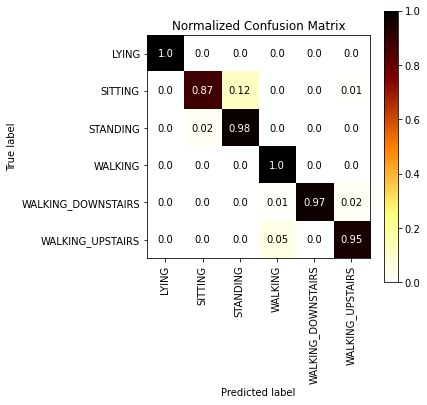

In [0]:
skplt.metrics.plot_confusion_matrix(y_test,predicted,figsize=(5,5),x_tick_rotation=90,cmap='afmhot_r',normalize = True)

In [0]:
import pickle
#filename = 'har.sav'
#pickle.dump(LR, open(filename, 'wb'))
 
# some time later...

# load the model from disk
loaded_model = pickle.load(open('/content/mymodel', 'rb'))


In [0]:
from sklearn.externals import joblib
joblib.dump(LR,'/content/mymodel')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['/content/mymodel']

In [0]:
model = joblib.load('/content/mymodel')

In [0]:
import numpy as np
randnums= np.random.uniform(-1,1,561)

In [0]:
randnums = randnums.reshape(1,-1)
fg = model.predict(randnums)

In [0]:
fgs = str(fg)

In [0]:
fgs

"['SITTING']"

In [0]:
final = ''.join(e for e in fgs if e.isalnum())

In [0]:
final

'SITTING'

In [0]:
fgs

"['SITTING']"

In [0]:
kk = model.predict(randnums)

In [0]:
kk

array(['SITTING'], dtype=object)

> **Gaussian Naive Bayes**

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
params = {}
classifier = GaussianNB()
cross_val = GridSearchCV(classifier,params, cv=skf)
cross_val.fit(x_train, y_train)
predicted1 = cross_val.predict(x_test)

In [0]:
cross_val.cv_results_

In [0]:
gaussian_accuracy = accuracy_score(y_test, predicted1)

In [0]:
gaussian_accuracy

In [0]:
gaussian_accuracy = 0.7702748557855447

In [0]:
skplt.metrics.plot_confusion_matrix(y_test,predicted1,figsize=(5,5),x_tick_rotation=90,cmap='PuBuGn',normalize = True)

> **Linear SVM**

In [0]:
from sklearn.svm import LinearSVC
params = {"C":[0.001,0.01,0.1,1,10**1,10**2,10**3]}
classifier = LinearSVC(multi_class='ovr',dual=False)
cross_val = GridSearchCV(classifier, params, cv=3)
cross_val.fit(x_train, y_train)
predicted = cross_val.predict(x_test)

In [0]:
linear_svm_accuracy = accuracy_score(y_test, predicted)
linear_svm_accuracy

In [0]:
linear_svm_accuracy = 0.9667458432304038

In [0]:
cross_val.best_estimator_

In [0]:
cross_val.best_params_

In [0]:
skplt.metrics.plot_confusion_matrix(y_test,predicted,figsize=(5,5),x_tick_rotation=90,cmap='BuPu',normalize = True)

> **RBF SVM** (Radial Basis Function Kernel)

In [0]:
from sklearn.svm import SVC
params = {"C":[0.001,0.01,0.1,1,10**1,10**2,10**3]}
classifier = SVC(kernel='rbf')
cross_val = GridSearchCV(classifier, params, cv=3)
cross_val.fit(x_train, y_train)
predicted = cross_val.predict(x_test)

In [0]:
rbf_svm_accuracy = accuracy_score(y_test, predicted)
rbf_svm_accuracy

In [0]:
rbf_svm_accuracy = 0.9653885307091958

In [0]:
cross_val.best_estimator_

In [0]:
cross_val.best_params_

In [0]:
skplt.metrics.plot_confusion_matrix(y_test,predicted,figsize=(5,5),x_tick_rotation=90,cmap='hot_r',normalize = True)

> **Decision Tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier
params = {"max_depth": [2, 3, 4, 5, 6, 7, 8]}
classifier = DecisionTreeClassifier()
cross_val = GridSearchCV(classifier, params, cv=5)
cross_val.fit(x_train, y_train)
predicted = cross_val.predict(x_test)

In [0]:
decision_tree_accuracy = accuracy_score(y_test, predicted)
decision_tree_accuracy

In [0]:
decision_tree_accuracy = 0.8727519511367492

In [0]:
cross_val.best_estimator_

In [0]:
cross_val.best_params_

In [0]:
skplt.metrics.plot_confusion_matrix(y_test,predicted,figsize=(5,5),x_tick_rotation=90,cmap='pink_r',normalize = True)

> **Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier
params = {"n_estimators": [50, 100, 200, 400]}
classifier = RandomForestClassifier()
cross_val = GridSearchCV(classifier, params, cv=3)
cross_val.fit(x_train, y_train)
predicted = cross_val.predict(x_test)

In [0]:
random_forest_accuracy = accuracy_score(y_test, predicted)
random_forest_accuracy

In [0]:
random_forest_accuracy = 0.8727519511367492

In [0]:
cross_val.best_estimator_

In [0]:
cross_val.best_params_

In [0]:
skplt.metrics.plot_confusion_matrix(y_test,predicted,figsize=(5,5),x_tick_rotation=90,cmap='ocean_r',normalize = True)

> **Gradient Boosting**

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
params = {"n_estimators": [20,30], "max_depth":[1, 1.5]}
classifier = GradientBoostingClassifier()
cross_val = GridSearchCV(classifier, params, cv=3)
cross_val.fit(x_train, y_train)
predicted = cross_val.predict(x_test)
gradient_boosted_accuracy = accuracy_score(y_test, predicted)

In [0]:
gradient_boosted_accuracy

In [0]:
gradient_boosted_accuracy = 0.8734306073973532

In [0]:
cross_val.best_estimator_

In [0]:
skplt.metrics.plot_confusion_matrix(y_test,predicted,figsize=(5,5),x_tick_rotation=90,cmap='copper_r',normalize = True)

In [0]:
import pandas as pd
Model=["Logistic Regression", "Gaussian NB", "Linear SVM", "RBF SVM", "Decision Tree", "Random Forest", "Gradient Boosting"]
Accuracy=[logistic_accuracy*100,gaussian_accuracy*100,linear_svm_accuracy*100,rbf_svm_accuracy*100,decision_tree_accuracy*100,random_forest_accuracy*100,gradient_boosted_accuracy*100]
df = pd.DataFrame(dict(Model=Model, Accuracy=Accuracy))
df

,Accuracy,Model
0,96.199525,Logistic Regression
1,77.027486,Gaussian NB
2,96.674584,Linear SVM
3,96.538853,RBF SVM
4,87.275195,Decision Tree
5,87.275195,Random Forest
6,87.343061,Gradient Boosting


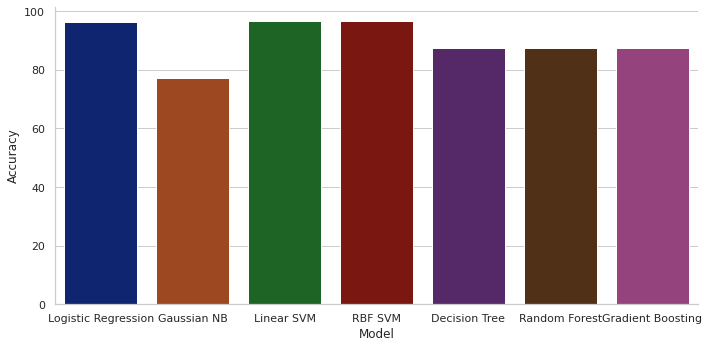

In [0]:
import seaborn as sns
sns.catplot("Model","Accuracy", data=df ,palette="dark",aspect=2,kind="bar")

# **Deep Learning Modelling**
> We'll be using 128 sized time step raw readings obtained from accelerometers and the gyrometers.


In [0]:
# Xtrain Readings
x_train_dl = []
for signal in all_signals_list:
  x_train_dl.append(pd.read_csv("/content/drive/My Drive/UCI HAR Dataset/train/Inertial Signals/"+ signal + "train.txt", delim_whitespace = True, header = None).as_matrix())
  

In [0]:
x_train_dl = np.array(x_train_dl)
print("Before transformation Xtrain shape : ",x_train_dl.shape)
x_train_dl = np.transpose(x_train_dl,(1,2,0))
print("After transformation Xtrain shape : ", x_train_dl.shape)

Xtrain data interpretation:
> 7352 : no. of samples.<br>
> 128 : time step raw readings from the sensor for each sample.<br>
> 9 : the number of signals (check all_signals_list) in the dataset.


In [0]:
# Xtest Readings
x_test_dl = []
for signal in all_signals_list:
  x_test_dl.append(pd.read_csv("/content/drive/My Drive/UCI HAR Dataset/test/Inertial Signals/"+ signal + "test.txt", delim_whitespace = True, header = None).as_matrix())

In [0]:
x_test_dl = np.array(x_test_dl)
print("Before transformation Xtest shape : ",x_test_dl.shape)
x_test_dl = np.transpose(x_test_dl,(1,2,0))
print("After transformation Xtest shape : ", x_test_dl.shape)

Xtest data interpretation:
> 2947 : no. of samples.<br>
> 128 : time step raw readings from the sensor for each sample.<br>
> 9 : the number of signals (check all_signals_list) in the dataset.


In [0]:
y_train = train_df["activity_id"]
y_test = test_df["activity_id"]
y_train_dl = pd.get_dummies(y_train).as_matrix()
y_test_dl = pd.get_dummies(y_test).as_matrix()

> ytrain and ytest have been converted into dummy/indicator variables (pandas version of one-hot-encoder).

In [0]:
x_train_dl.shape, y_train_dl.shape,x_test_dl.shape,y_test_dl.shape

In [0]:
np.save("/content/drive/My Drive/UCI HAR Dataset/train", x_train_dl)
np.save("/content/drive/My Drive/UCI HAR Dataset/train_label", y_train_dl)
np.save("/content/drive/My Drive/UCI HAR Dataset/test", x_test_dl)
np.save("/content/drive/My Drive/UCI HAR Dataset/test_label", y_test_dl)

In [0]:
# Saved and loaded as Numpy Array file.
def data():
    x_train = np.load("/content/drive/My Drive/UCI HAR Dataset/train.npy")
    y_train = np.load("/content/drive/My Drive/UCI HAR Dataset/train_label.npy")
    x_test = np.load("/content/drive/My Drive/UCI HAR Dataset/test.npy")
    y_test = np.load("/content/drive/My Drive/UCI HAR Dataset/test_label.npy")
    return x_train, y_train, x_test, y_test

In [0]:
len(x_train_dl[0][0])

**Hyperas** acts wrapper around hyperopt (HyperParameter Tuning) for fast prototyping with keras models works by doing template replacement of everything in the {{...}} into a separate temporary file, and then running the model with the replaced braces.

In [0]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

Applying LSTM for the best parameters.

In [0]:
def create_model(x_train, y_train, x_test, y_test):
    
    epochs = 8
    batch_size = 32
    timesteps = x_train.shape[1]    #128
    input_dim = len(x_train[0][0])  #9
    n_classes = 6
    
    model = Sequential()
    
    model.add(LSTM(64, return_sequences = True, input_shape = (timesteps, input_dim)))
    model.add(Dropout({{uniform(0, 1)}}))
    
    model.add(LSTM({{choice([32, 16])}}))
    model.add(Dropout({{uniform(0, 1)}}))
    
    model.add(Dense(n_classes, activation='sigmoid'))
    
    print(model.summary())
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='rmsprop')
    
    result = model.fit(x_train, y_train, batch_size = batch_size, 
                       epochs=epochs, verbose=2, validation_split=0.01)
    
    validation_acc = np.amax(result.history['val_accuracy']) 
    
    print('Best validation acc of epoch:', validation_acc)
    
    return {'loss': -validation_acc, 'status': STATUS_OK, 'model': model}

In [0]:
best_run, best_model = optim.minimize(model=create_model,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=4,
                                      trials=Trials(),
                                      notebook_name = "drive/My Drive/Colab Notebooks/har")
x_train, y_train, x_test, y_test = data()

score = best_model.evaluate(x_test, y_test)


print('Accuracy : ')
acc = np.round((score[1]*100), 2)
print(str(acc)+"%\n")
    

print('Best Hyper-Parameters : ')

print(best_run)
print("\n\n")

true_labels = [np.argmax(i)+1 for i in y_test]
predicted_probs = best_model.predict(x_test)
predicted_labels = [np.argmax(i)+1 for i in predicted_probs]

In [0]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(true_labels,predicted_labels,figsize=(5,5),x_tick_rotation=90,cmap='cubehelix_r',normalize = True)

# Model Deployment through Flask!

In [0]:
!pip install flask-ngrok

In [0]:
from flask_ngrok import run_with_ngrok
import flask
app = flask.Flask(__name__, template_folder='/content/')
run_with_ngrok(app)
@app.route('/', methods=['GET', 'POST'])
def main():
    if flask.request.method == 'GET':
        return(flask.render_template('main.html'))
    if flask.request.method == 'POST':
        randnums= np.random.uniform(-1,1,561)
        randnums = randnums.reshape(1,-1)
        fg = model.predict(randnums)
        fgs = str(fg)
        final = ''.join(e for e in fgs if e.isalnum())
        return flask.render_template('main.html', result=final)
if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://84beba42274e.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [29/May/2020 08:51:31] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/May/2020 08:51:33] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [29/May/2020 08:51:33] "POST / HTTP/1.1" 200 -


# Project Summary
> * For the Machine Learning modelling, the features used were very well engineered by the domain experts in signal processing, through which we even achieved accuracies of around 96%.

> * For Deep Learning Modelling, 2 - Layered LSTM Neural Network gave us an accuracy of around 91% on the 128 raw time series data which was not preprocessed or re-engineered, which pretty much summarizes the capabilities of modern Deep Learning models.  